## Background

Airbnb adalah online marketplace yang menyediakan akomodasi bagi orang-orang yang ingin menyewa ataupun menyewakan kamar pribadi, apartemen, villa, maupun rumahnya. 
Bagi pemilik properti, tentunya layanan akomodasi ini dapat menjadi penghasilan tambahan karena mereka dapat menyewakan propertinya. Sementara bagi pengguna, properti di Airbnb bisa menjadi alternatif penginapan yang lebih terjangkau dibandingkan dengan hotel.
Di analisa ini Airbnb ingin mengetahui faktor yang mempengaruhi income

In [4]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt # import library untuk visualisasi data

In [5]:
# import file data
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [6]:
display(df.describe())
df.describe(include='object')

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,15854.000000,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,7926.500000,1.579369e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,4576.799919,2.945960e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,0.000000,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3963.250000,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,7926.500000,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,11889.750000,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,15853.000000,7.910000e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,12/11/2022
freq,45,228,2153,8912,189


In [7]:
# tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  float64
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [8]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

## Data Cleansing

In [9]:
# Copy data
df_clean = df.copy()
df_clean.head(5)

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [10]:
# Drop Kolom "Unnamed :", Kolom ini di hapus karena sudah ada indexing di dataset ini
df_clean.drop(df.filter(regex = "Unname"), axis = 1, inplace= True)
df_clean. head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745.0,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


In [12]:
# Cek duplicate data
len(df_clean)-len(df_clean.drop_duplicates())

5

NOTE : ada 5 data duplicate

In [13]:
# Cek Price karena pada described data terdapat keanehan nilai min price yang bernilai '0' karena hampir tidak mungkin penyewaan property di Airbnb bernilai '0'
# Menghitung jumlah listing per price untuk tau brp banyak listing yg memiliki nilai price = 0
df_clean.groupby(by= "price").price.value_counts()

price
0          1
278        1
280        3
295        1
300        1
          ..
600700     1
710760     1
1000000    5
1014758    1
1100000    1
Name: count, Length: 3040, dtype: int64

In [14]:
from scipy.stats import kstest
# Cek kolom price dengan normalisasi Kolmogorov-Smirnov
ksdata, p_value = kstest(df_clean['price'], 'norm')
print(f'Statistic: {ksdata}, P-Value: {p_value}')

Statistic: 0.9999369244354737, P-Value: 0.0


Pengecekan Normalisasi menggunakan Kolmogorov-Smirnov karena jumlah data > 2000

Nilai price tidak terdistribusi normal karena p-val bernilai < 0.5

sehingga price yang bernilai 0 di gantikan dengan nilai median dari price

In [15]:
# Mencari nilai Median 'price'
m = df_clean['price'].median()
m

1429.0

In [16]:
# Replace price yang bernilai nol dengan nilai median dari 'price'
df_clean['price'] = df_clean['price'].replace(0,m)

In [17]:
df_clean.isnull().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

Untuk data kosong pada kolom last_review & reviews_per_month dapat di biarkan apa adanya, karena kemungkinan data ini kosong mamng karena belum di review atau belum pernah di sewa sehingga tidak ada review

## Outlier

Ada 2 variabel yg akan di cek data Outlier nya, yaitu price & minimum night

Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'Price'")

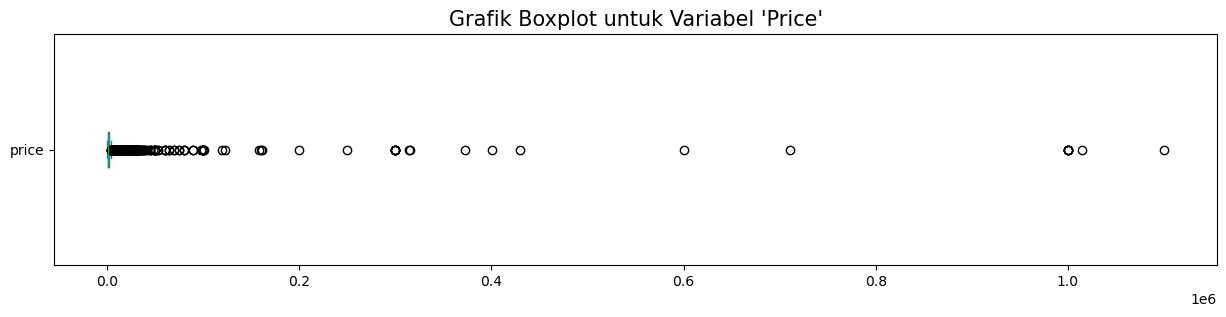

In [18]:
# Menegcek OUtlier price
# price box plot
df_clean.price.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'Price'", size = "15")

In [19]:
# Outlier price
Q1 = df_clean.price.quantile(.25)
Q3 = df_clean.price.quantile(.75)
IQR = Q3 - Q1
print('IQR price: ', IQR)

# batas data
above = Q3 + 1.5 * IQR
below = Q3 - 1.5 * IQR

print('Batas Atas : ', above)
print('Batas Bawah : ', below)


IQR price:  1529.0
Batas Atas :  4722.5
Batas Bawah :  135.5


In [20]:
# Menghitung jumlah data di > batas atas price
data = df_clean.shape[0]
x = len(df_clean[df_clean.price > above])
print('Jumlah data :', data)
print('Jumlah data di dengan nilai > batas atas :', x)

Jumlah data : 15854
Jumlah data di dengan nilai > batas atas : 1403


Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'minimum_nights'")

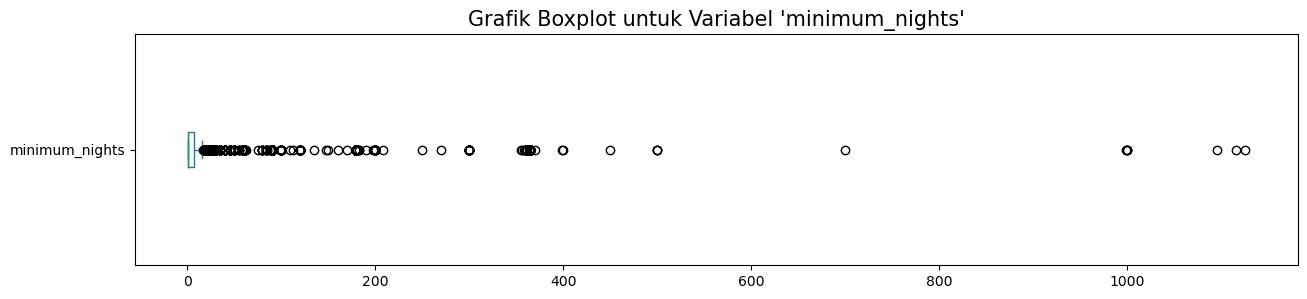

In [21]:
# Menegcek OUtlier minimum_nights
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'minimum_nights'", size = "15")

In [22]:
# Outlier price
Q1n = df_clean.minimum_nights.quantile(.25)
Q3n = df_clean.minimum_nights.quantile(.75)
IQRn= Q3n - Q1n
print('IQR minimum_nights: ', IQRn)

# batas data                                     
above_n = Q3n + 1.5 * IQRn
below_n = Q3n - 1.5 * IQRn

print('Batas Atas : ', above_n)
print('Batas Bawah : ', below_n)

IQR minimum_nights:  6.0
Batas Atas :  16.0
Batas Bawah :  -2.0


In [23]:
# Menghitung jumlah data di > batas atas minimum_nights
data = df_clean.shape[0]
y = len(df_clean[df_clean.minimum_nights > above_n])
print('Jumlah data :', data)
print('Jumlah data di dengan nilai > batas atas :', y)

Jumlah data : 15854
Jumlah data di dengan nilai > batas atas : 3168


Karena jumlah 3168 terlalu banyak untuk di drop dari dataset, kita coba menetapkan batas atas minimum_nights di angka 31 (jumlah max hari dalam 1 bulan). 

Pertimbangan nya karena untuk sewa property ada batas waktu max penyewaan

In [24]:
# Menghitung jumlah baris data saat batas atas minimum_nights di tetapkan 31
data = df_clean.shape[0]
z = len(df_clean[df_clean.minimum_nights > 31])
print('Jumlah data :', data)
print('Jumlah data di dengan nilai > 31 hari :', z)

Jumlah data : 15854
Jumlah data di dengan nilai > 31 hari : 839


Dari Pengececekan Jumlah Outlier dari price & minimum night. KIta putuskan untuk menghapus outlier price dan minimum night dengan batas angka minimum night 31 hari
pertimbangan nya karena jumlah outiernya diharapkan tidak merubah pola data asli nya

In [25]:
# Menghapus OUtlier
df_clean.drop(df_clean[df_clean.price > above].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 31].index, axis=0, inplace=True)

print('Jumlah baris data Awal: ', data)
print('Jumlah baris data after cleansing : ', df_clean.shape[0])
print(f'{round(((1 - (df_clean.shape[0]/15854))*100), 2)}% data awal yang di hapus.')

Jumlah baris data Awal:  15854
Jumlah baris data after cleansing :  13666
13.8% data awal yang di hapus.


Total listing data yg di drop dari outlier price > above and minimum_nights > 31 jika di jumlahkan manual akan bernilai 2242
tetapi aktual yg di drop sebanyak 2188 list data , hal ini di karenakan adanya irisan antara outlier nya price & min_night

Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'Price'")

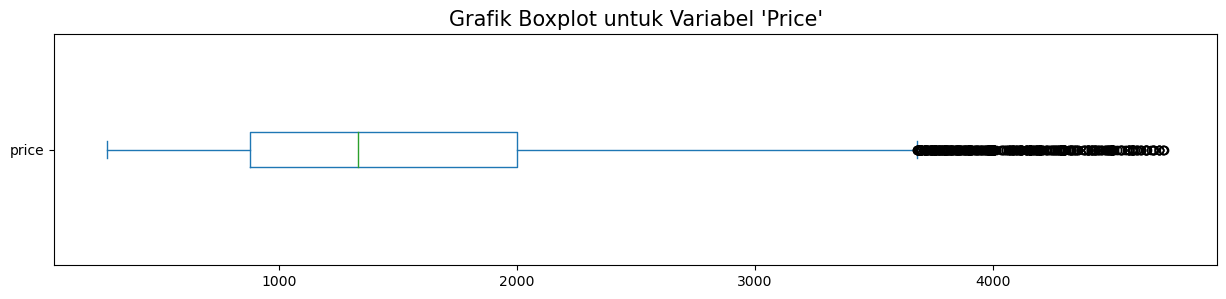

In [26]:
df_clean.price.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'Price'", size = "15")

Text(0.5, 1.0, "Grafik Boxplot untuk Variabel 'minimum_nights'")

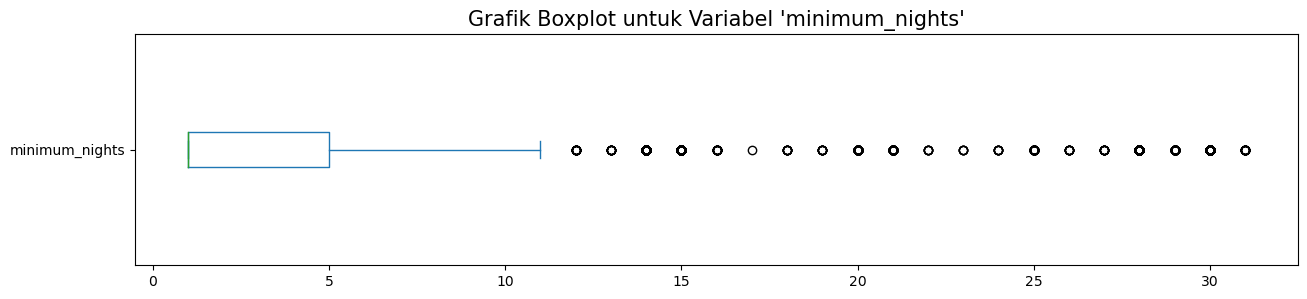

In [27]:
df_clean.minimum_nights.plot(kind='box', vert=False, figsize=(15,3)) 
plt.title("Grafik Boxplot untuk Variabel 'minimum_nights'", size = "15")

In [28]:
# Gambaran data setelah proses cleansing
df_clean.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.366600e+04,1.366600e+04,13666.000000,13666.000000,13666.000000,13666.000000,13666.000000,8905.000000,13666.000000,13666.000000,13666.000000
mean,1.617283e+17,1.539274e+08,13.745942,100.559962,1582.368798,6.563223,17.550856,0.835191,14.383580,241.384970,3.696400
std,2.973922e+17,1.313755e+08,0.043809,0.051964,948.419966,10.017679,42.161196,1.108637,31.673443,125.651347,9.197955
min,2.793400e+04,5.892000e+04,13.527300,100.329550,278.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.107760e+07,4.056704e+07,13.719800,100.529210,880.000000,1.000000,0.000000,0.120000,1.000000,134.000000,0.000000
50%,3.505010e+07,1.224556e+08,13.739115,100.561204,1331.000000,1.000000,2.000000,0.460000,4.000000,303.000000,0.000000
75%,5.309384e+07,2.365415e+08,13.760447,100.585678,2000.000000,5.000000,15.000000,1.090000,13.000000,359.000000,3.000000
max,7.910000e+17,4.926659e+08,13.953540,100.923440,4720.000000,31.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


Text(0, 0.5, 'Frekuensi')

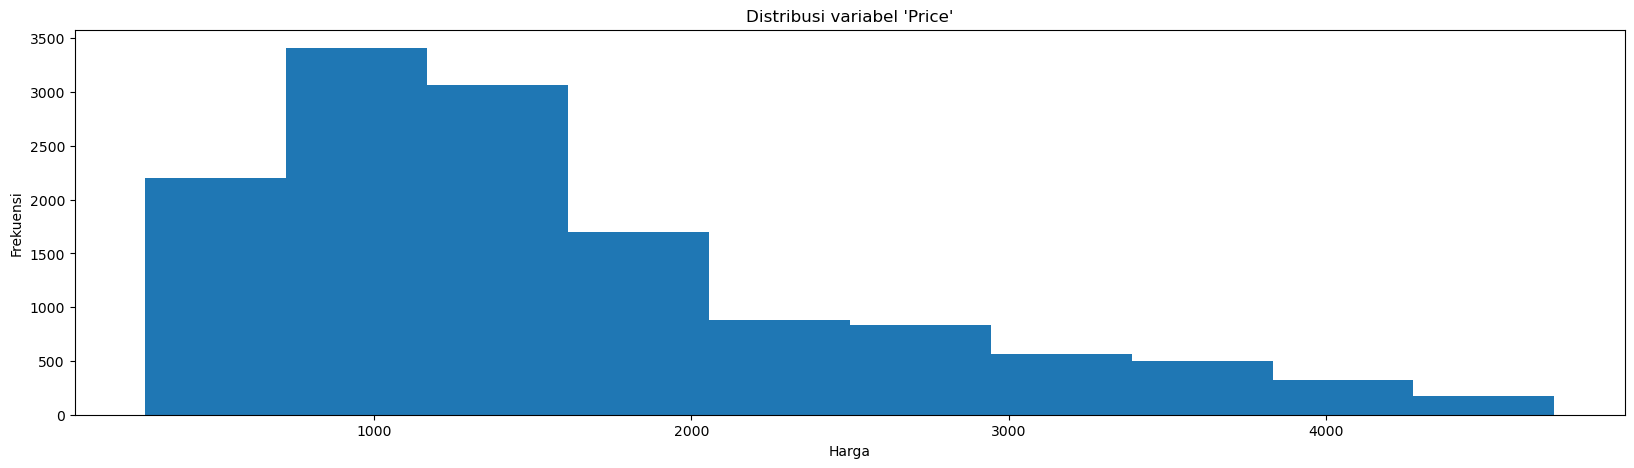

In [29]:
# configure the figure size
plt.figure(figsize= (20, 5))

# define the variable to show
plt.hist(df_clean.price)
plt.title("Distribusi variabel 'Price'")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")

Text(0, 0.5, 'Frekuensi')

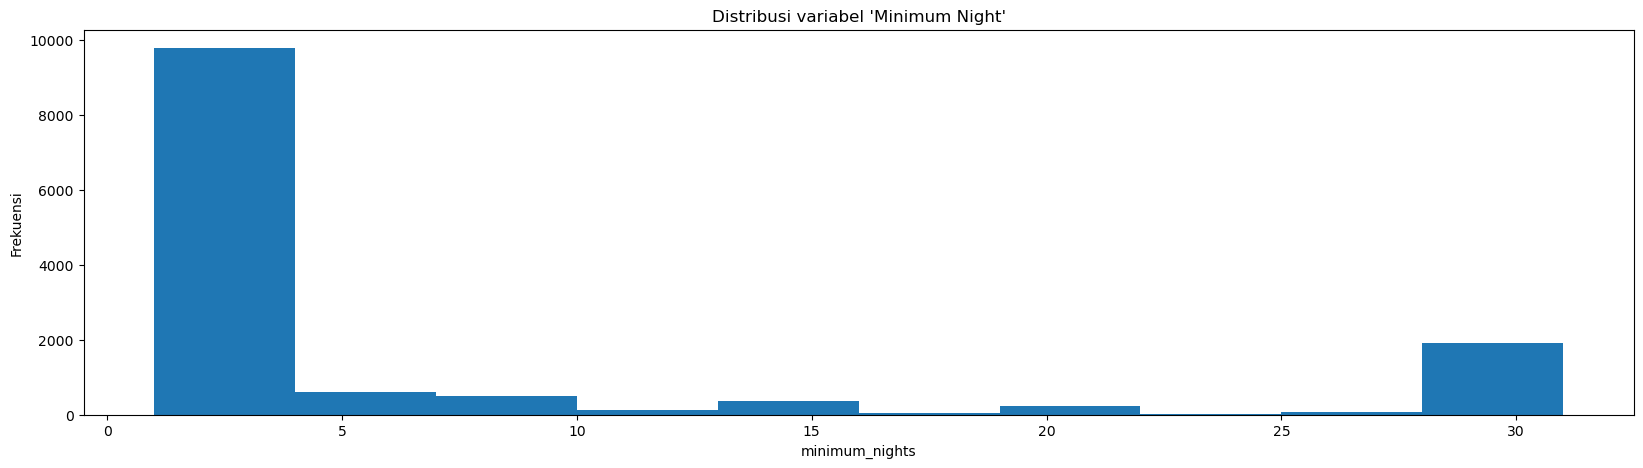

In [30]:
# configure the figure size
plt.figure(figsize= (20, 5))

# define the variable to show
plt.hist(df_clean.minimum_nights)
plt.title("Distribusi variabel 'Minimum Night'")
plt.xlabel("minimum_nights")
plt.ylabel("Frekuensi")

## Analisa

1. perbandingan price & room type
2. harga di masing2 Neighborhood
3. korelasi Price, Minimum Nights, and Occupancy Rate

Room Type

Text(0, 0.5, 'latitude')

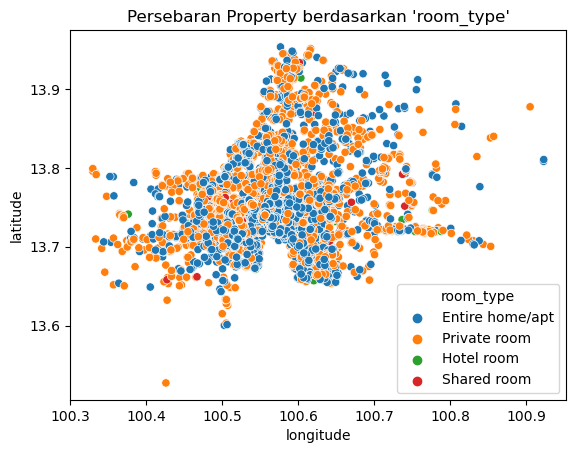

In [31]:
# Persebaran room type
sb.scatterplot(data = df_clean, x = 'longitude', y = 'latitude', hue = 'room_type')
plt.title ("Persebaran Property berdasarkan 'room_type'")
plt.xlabel("longitude")
plt.ylabel("latitude")

In [32]:
# Pesentase room type di AIrbnb Bangkok
room_percentage = df_clean.room_type.value_counts()/df_clean.shape[0]
room_percentage

room_type
Entire home/apt    0.548149
Private room       0.374506
Hotel room         0.040392
Shared room        0.036953
Name: count, dtype: float64

Text(0.5, 1.0, 'Pesentase Room_Type di Airbnb Bangkok')

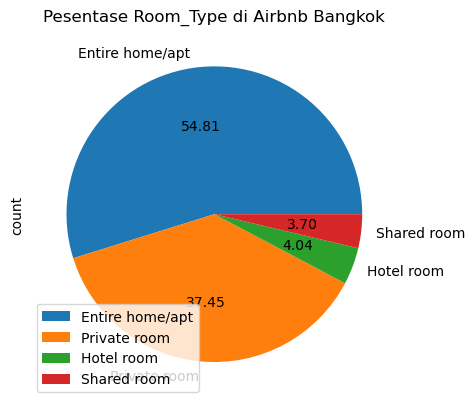

In [33]:
# Piechart Percentase RoomType
R_percentage = df_clean.room_type.value_counts().reset_index()
R_percentage.columns = ['room_type','count']         # Rename nama column

R_percentage.plot.pie(
    y = 'count',  # data yg ingin di tampilkan
    labels = R_percentage.room_type,
    autopct = '%.2f')
plt.title("Pesentase Room_Type di Airbnb Bangkok")

Room Type --> Di dominasi oleh tipe Entire home/apt lalu Private room, Untuk Hotel room dan Shared room selisih jumlah nya tidak terlalu jauh

Neighbourhood

In [34]:
# 5 neighbourhoods tertinggi
df_clean.neighbourhood.value_counts().head()

neighbourhood
Khlong Toei    1782
Vadhana        1686
Ratchathewi    1006
Huai Khwang     979
Sathon          731
Name: count, dtype: int64

In [35]:
# 5 neighbourhoods terendah
df_clean.neighbourhood.value_counts().tail()     

neighbourhood
Bang Khun thain    15
Nong Chok          11
Thawi Watthana     11
Nong Khaem          9
Bang Bon            5
Name: count, dtype: int64

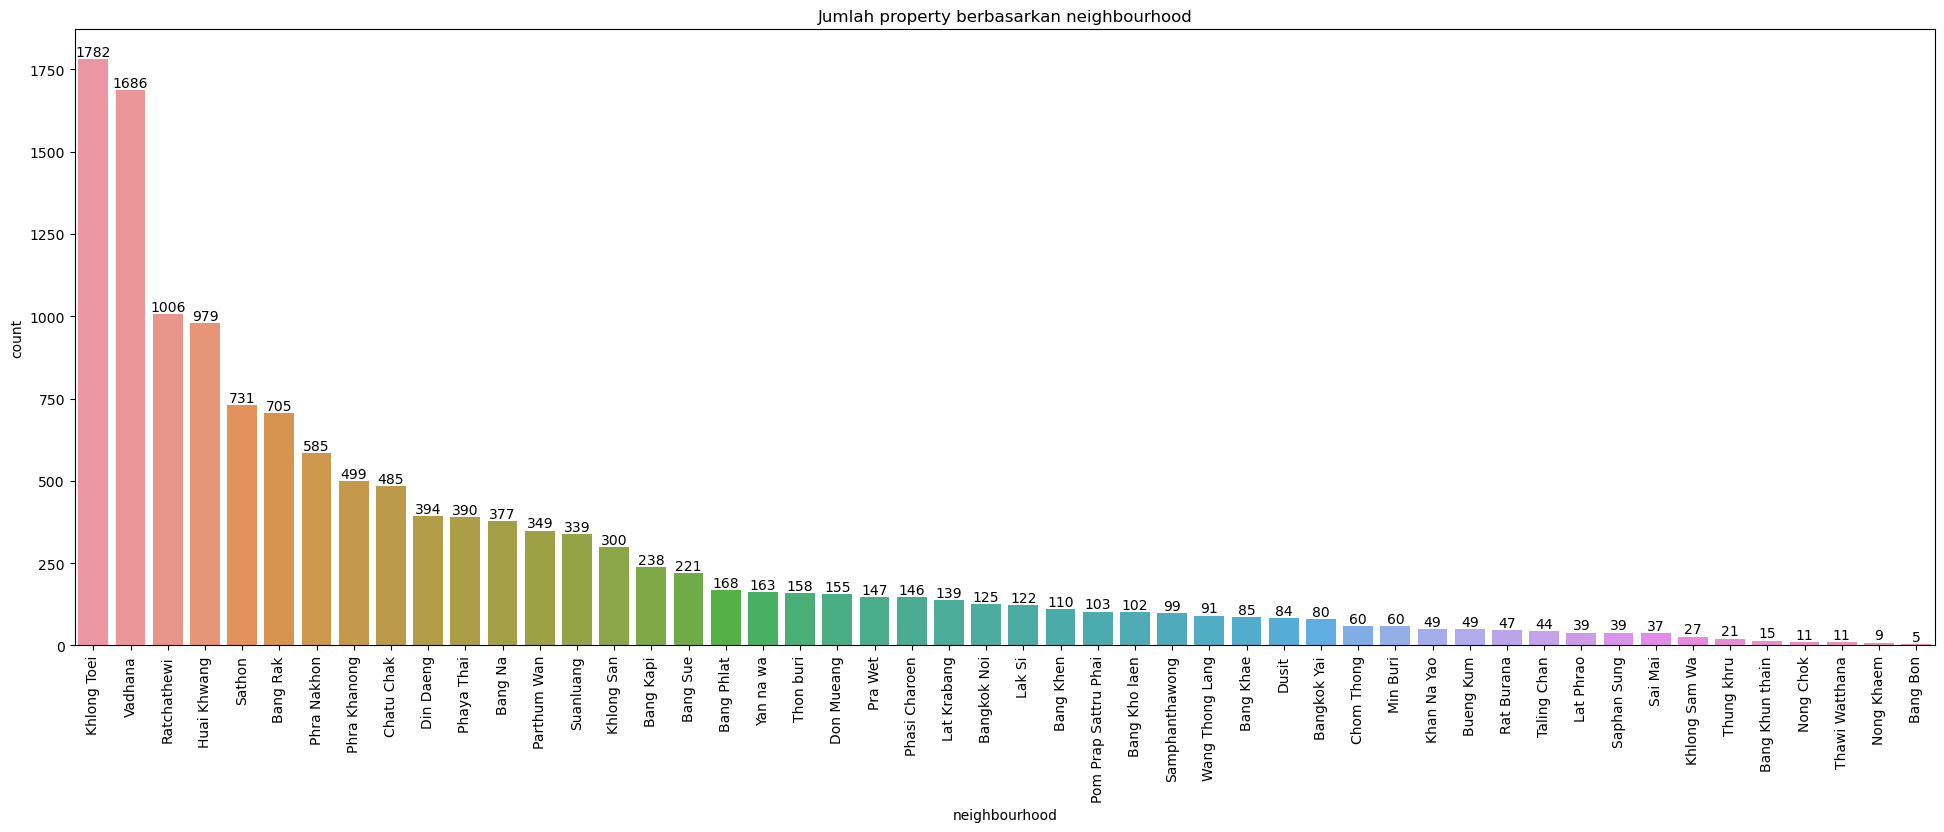

In [36]:
# Jumlah property berbasarkan neighbourhood
plt.figure(figsize = (24,8))
ax = sb.countplot(x='neighbourhood', data=df_clean, order=df_clean['neighbourhood'].value_counts().index)
abs_values = df_clean['neighbourhood'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title('Jumlah property berbasarkan neighbourhood')
plt.xticks(rotation=90)
plt.show()

Price & Minimum Income

In [37]:
# Menghitung Minimum income dengan mengkalikan minimum night dan price
df_clean['min_income'] = df_clean.minimum_nights * df_clean.price
df_clean.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,min_income
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0,5715
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0,1316
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1,9002
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0,1905
6,48736.0,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2/3/2014,0.01,1,365,0,4674


In [39]:
df_clean.groupby('neighbourhood').min_income.sum().sort_values(ascending=False)[:5]

neighbourhood
Vadhana        25585642
Khlong Toei    16974654
Ratchathewi    13125800
Huai Khwang    10022030
Bang Rak        8737230
Name: min_income, dtype: int64

In [40]:
df_clean.groupby('host_name').min_income.sum().sort_values(ascending=False)[:5]

host_name
ISanook Hotel    2590950
Windy            1885519
Miu Miu          1656843
Joseph           1495128
Alex             1404668
Name: min_income, dtype: int64

In [41]:
df_clean.groupby('room_type').min_income.sum().sort_values(ascending=False)[:5]

room_type
Entire home/apt    101235092
Private room        26620764
Hotel room           1492565
Shared room           519387
Name: min_income, dtype: int64

In [42]:
df_clean.groupby(['neighbourhood','host_name','room_type']).min_income.sum().sort_values(ascending=False)[:5]

neighbourhood  host_name      room_type      
Bang Rak       ISanook Hotel  Private room       2569950
Vadhana        Joseph         Entire home/apt    1475808
Ratchathewi    Miu Miu        Entire home/apt    1132860
Vadhana        Max            Entire home/apt    1059392
Ratchathewi    Aidan          Entire home/apt     991309
Name: min_income, dtype: int64

Note :
1. 5 host dengan minimum income terbesar berada memiliki property di top 5 neighbourhood
2. Host yang memiliki room type Entire home/apt memiliki kemungkinan untuk mendapatkan minimum income yang besar


In [43]:
# Bangkok mean price
df_clean.price.mean()

1582.3687984779745

In [44]:
# Bangkok median price
df_clean.price.median()

1331.0

Batas tengah harga sewa properti Airbnb di bangkok adalah 1331, sedangkan rata2 nya adalah 1582

In [45]:
# Rata2 harga sewa dari yang tertinggi berdasarkan neighbourhoods
high_price = df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:5]
high_price

neighbourhood
Parthum Wan       2235.323782
Bang Rak          1938.990071
Vadhana           1924.409846
Samphanthawong    1866.323232
Nong Chok         1827.545455
Name: price, dtype: float64

5 neighbourhoods dengan harga sewa rata2 tertinggi adalah Parthum Wan, Bang Rak, Vadhana, Samphanthawong, and Nong Chok merupakan area pusat kota yg di kelilingi oleh pusat perbelanjaan, tempat wisata, kuliner dan seni (https://www.tripadvisor.com/Attractions-g293916-Activities-zfn15620288-Bangkok.html https://id.wikipedia.org/wiki/Bangkok )

In [46]:
# Harga rata sewa properti termurah berdasarkan neighbourhoods
low_price = df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:-6:-1]
low_price

neighbourhood
Lak Si           1143.833333
Nong Khaem       1205.222222
Don Mueang       1273.910180
Lat Krabang      1358.523490
Phasi Charoen    1370.219355
Name: price, dtype: float64

Lak Si berada di lingkungan rumah bagi kompleks kuil Buddha, sedangkan Nong Khaem merupakan salah satu dari tiga pusat pembuangan limbah padat utama di Bangkok (https://en.wikipedia.org/wiki/Nong_Khaem_district)

In [47]:
df_clean.groupby('room_type').price.mean()

room_type
Entire home/apt    1740.076625
Hotel room         1690.757246
Private room       1432.995311
Shared room         638.356436
Name: price, dtype: float64

Harga sewa Entire home/apt memiliki nilai rata2 paling tinggi

Minimum nights

In [48]:
# rata2 minimum nights by room type
df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:5]

room_type
Entire home/apt    9.019891
Private room       4.022274
Hotel room         1.577899
Shared room        1.322772
Name: minimum_nights, dtype: float64

In [49]:
# Menghitung Occupancy. low <5 nights, medium 5-10 nights, high >10 nights
df_clean['Occupancy'] = np.where(df_clean['minimum_nights'] > 10, 'high', 
         (np.where(df_clean['minimum_nights'] < 5, 'low', 'medium')))
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,min_income,Occupancy
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0,5715,low
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0,1316,low
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1,9002,medium
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0,1905,low
6,48736.0,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2/3/2014,0.01,1,365,0,4674,low


In [50]:
df_clean.groupby(['Occupancy']).minimum_nights.count()

Occupancy
high      2635
low       9966
medium    1065
Name: minimum_nights, dtype: int64

In [51]:
df_clean.groupby(['room_type','Occupancy']).minimum_nights.count()

room_type        Occupancy
Entire home/apt  high         2119
                 low          4555
                 medium        817
Hotel room       high           10
                 low           539
                 medium          3
Private room     high          504
                 low          4381
                 medium        233
Shared room      high            2
                 low           491
                 medium         12
Name: minimum_nights, dtype: int64

Note :
1. tingkat Occupancy < 5 hari di kategori low sangat tinggi di tiap room_type. 
2. Entire home/apt memiliki nilai Occupancy > 10 hari yang cukup tinggi. ini bisa jadi potensi untuk meningkatkan income dengan memberikan discount di kelipatan hari tertentu


## Korelasi antar Variabel

In [52]:
# Korelasi
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
     'calculated_host_listings_count', 'number_of_reviews_ltm','min_income']].corr(method= "spearman")
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,number_of_reviews_ltm,min_income
price,1.000000,-0.038326,-0.001025,0.166013,0.088685,0.075393,0.469716
minimum_nights,-0.038326,1.000000,0.065834,-0.035876,-0.097370,0.068636,0.833860
number_of_reviews,-0.001025,0.065834,1.000000,0.588647,0.224982,0.714891,0.042207
reviews_per_month,0.166013,-0.035876,0.588647,1.000000,0.247848,0.711142,0.039155
calculated_host_listings_count,0.088685,-0.097370,0.224982,0.247848,1.000000,0.277369,-0.036675
number_of_reviews_ltm,0.075393,0.068636,0.714891,0.711142,0.277369,1.000000,0.086579
min_income,0.469716,0.833860,0.042207,0.039155,-0.036675,0.086579,1.000000


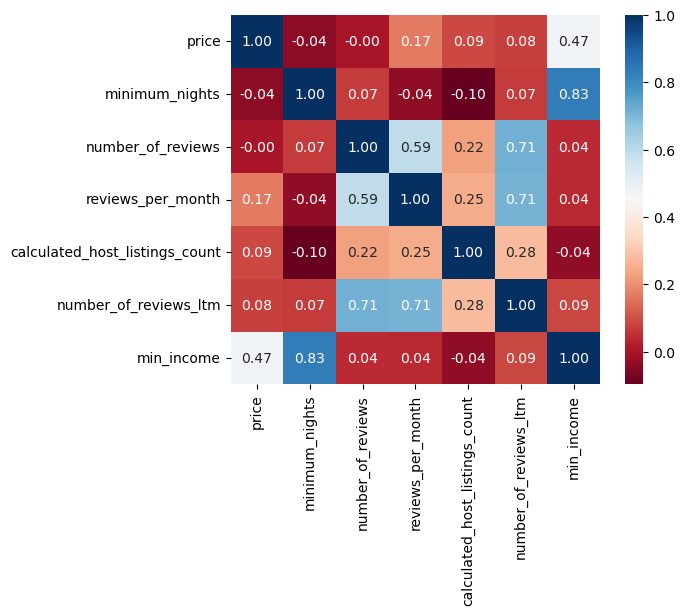

In [53]:
# correlation heatmap
sb.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [54]:
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,min_income,Occupancy
0,27934.0,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,1/6/2020,0.50,2,353,0,5715,low
1,27979.0,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0,1316,low
3,35780.0,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,4/1/2022,0.03,1,323,1,9002,medium
4,941865.0,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0,1905,low
6,48736.0,Condo with Chaopraya River View,222005,Athitaya,Rat Burana,13.68556,100.49535,Private room,1558,3,1,2/3/2014,0.01,1,365,0,4674,low


In [55]:
# Export Clean data untuk proses dashboard tableu
df_clean.to_csv(r"Airbnb.csv")

Note:
1. min_income sangat di pengaruhi oleh minimum_nights & price
2. jika popularitas dikaitan dengan number_of_reviews dan reviews_per_month maka ke 2 nya ini memiliki korelasi negatif terhadap price (review makin banyak maka price akan berkurang)
3. minimum_nights memiliki korelasi positif terhadap number_of_reviews. makin banyak yg review maka nilai minimum_nights akan naik

## Recommendation

1. Neighbourhood di pusat kota sangat potential untuk mendatangkan income lebih, sehingga sangat di rekomendasikan untuk lebih mempublish property di pusat kota
2. Airbnb bisa memberikan saran untuk host perorangan (bukan pemilik hotel) yg memiliki property Entire home/apt untuk menyewakan property nya, karena kemungkinan untuk mendapatkan income yg cukup besar
3.  Memberikan tambahan potongan harga untuk penyewaan berikutnya bagi pengguna yg memberikan review, karena review dari pengguna setidaknya mempengaruhi minimum_nights, yang akan berdampak pada peningkatan income bagi host & Airbnb